In [1]:
import numpy as np

X = np.array([[1, 2],
              [2, 3],
              [3, 4],
              [4, 5],
              [5, 6],
              [6, 7],
              [7, 8],
              [8, 9]])

labels = np.array([0, 1, 2, 0, 1, 2, 0])
X

array([[1, 2],
       [2, 3],
       [3, 4],
       [4, 5],
       [5, 6],
       [6, 7],
       [7, 8],
       [8, 9]])

In [11]:
X[: , np.newaxis, :]

array([[[1, 2]],

       [[2, 3]],

       [[3, 4]],

       [[4, 5]],

       [[5, 6]],

       [[6, 7]],

       [[7, 8]],

       [[8, 9]]])

In [2]:
X[:, :, np.newaxis]

array([[[1],
        [2]],

       [[2],
        [3]],

       [[3],
        [4]],

       [[4],
        [5]],

       [[5],
        [6]],

       [[6],
        [7]],

       [[7],
        [8]],

       [[8],
        [9]]])

In [3]:
cluster_centers = np.array([[1, 1],
                            [2, 2],
                            [3, 3]])
cluster_centers

array([[1, 1],
       [2, 2],
       [3, 3]])

In [4]:
cluster_centers.T

array([[1, 2, 3],
       [1, 2, 3]])

In [5]:
cluster_centers.T[np.newaxis, :, :]

array([[[1, 2, 3],
        [1, 2, 3]]])

In [6]:
X[:, :, np.newaxis] - cluster_centers.T[np.newaxis, :, :]

array([[[ 0, -1, -2],
        [ 1,  0, -1]],

       [[ 1,  0, -1],
        [ 2,  1,  0]],

       [[ 2,  1,  0],
        [ 3,  2,  1]],

       [[ 3,  2,  1],
        [ 4,  3,  2]],

       [[ 4,  3,  2],
        [ 5,  4,  3]],

       [[ 5,  4,  3],
        [ 6,  5,  4]],

       [[ 6,  5,  4],
        [ 7,  6,  5]],

       [[ 7,  6,  5],
        [ 8,  7,  6]]])

In [7]:
A = (X[:, :, np.newaxis] - cluster_centers.T[np.newaxis, :, :]) ** 2
A

array([[[ 0,  1,  4],
        [ 1,  0,  1]],

       [[ 1,  0,  1],
        [ 4,  1,  0]],

       [[ 4,  1,  0],
        [ 9,  4,  1]],

       [[ 9,  4,  1],
        [16,  9,  4]],

       [[16,  9,  4],
        [25, 16,  9]],

       [[25, 16,  9],
        [36, 25, 16]],

       [[36, 25, 16],
        [49, 36, 25]],

       [[49, 36, 25],
        [64, 49, 36]]])

In [8]:
A.sum(axis=1)

array([[  1,   1,   5],
       [  5,   1,   1],
       [ 13,   5,   1],
       [ 25,  13,   5],
       [ 41,  25,  13],
       [ 61,  41,  25],
       [ 85,  61,  41],
       [113,  85,  61]])

In [13]:
A.sum(axis=1).argmin(axis=1)

array([0, 1, 2, 2, 2, 2, 2, 2])

In [18]:
# データ生成
np.random.seed(0)
points1 = np.random.randn(50, 2)
points2 = np.random.randn(50, 2) + np.array([5, 0])
points3 = np.random.randn(50, 2) + np.array([5, 5])

points = np.r_[points1, points2, points3]
np.random.shuffle(points)

In [32]:
import numpy as np
import itertools

cycle = itertools.cycle(range(3))
np.fromiter(itertools.islice(cycle, points.shape[0]), dtype=np.int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


array([0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0,
       1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1,
       2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2,
       0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0,
       1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1,
       2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2,
       0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2])

In [52]:
"""
kmeansの実装
"""

import numpy as np
import itertools

class KMeans:
  # コンストラクタではクラスタ数、繰り返し数、シード値を設定
  def __init__(self, n_clusters, max_iter=1000, random_seed=0):
    self.n_clusters = n_clusters
    self.max_iter = max_iter
    self.random_state = np.randoｍ.RandomState(random_seed)
  
  def fit(self, X):
    # ラベルを生成し、ランダムに割り当て
    cycle = itertools.cycle(range(self.n_clusters)) # ラベル数を決めてiterableなオブジェクト生成
    self.labels_ = np.fromiter(
        itertools.islice(cycle, X.shape[0]), dtype=np.int) # isliceで出力する数を指定したイテレーター生成。flomiterでイテレート可能なオブジェクトから一次元配列生成。
    self.random_state.shuffle(self.labels_)
    
    # クラスタラベルの初期値作成
    labels＿prev = np.zeros(X.shape[0]) # 学習データのラベル
    self.cluster_centers_ = np.zeros((self.n_clusters, X.shape[1])) # 初期のクラスタ中心作成
    count = 0

    # 学習データによるクラスタリングの計算
    # 繰り返しの終了条件：1つ前のクラスタラベルをlabels＿prevに覚えさせておいて、新しく計算したラベル(self.lebels_)と比べて変化していないかどうか　および　繰り返し回数上限に達したかどうか
    while (not(self.labels_ == labels_prev).all() and count < self.max_iter):
    # クラスタ中心の計算
      for i in range(self.n_clusters):
        XX = X[i == self.labels_, :] # 任意のクラスタラベルを取り出して、
        self.cluster_centers_[i, :] = XX.mean(axis=0) # 各列の平均を計算したものがクラスタ中心

    # クラスタ中心との距離の計算。newaxisでの次元追加によるブローとキャスト計算で。
      dist = ((X[:, :, np.newaxis]
                     - self.cluster_centers_.T[np.newaxis, :, :])
                    ** 2).sum(axis=1)

    # 繰り返し条件の値の更新。
      labels_prev = self.labels_
      self.labels = dist.argmin(axis=1)
      count += 1
    
  def predict(self, X):
    dist = ((X[:, :, np.newaxis] - self.cluster_centers_.T[np.newaxis, :, :]) ** 2).sum(axis=1)
    labels = dist.argmin(axis=1)
    return labels

     

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


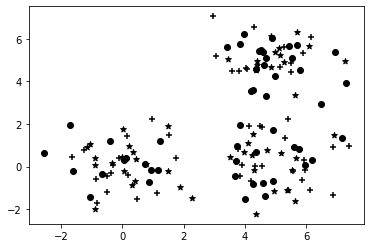

In [53]:


"""
人口データで実験
"""

import numpy as np
import matplotlib.pyplot as plt


# データ生成
np.random.seed(0)
points1 = np.random.randn(50, 2)
points2 = np.random.randn(50, 2) + np.array([5, 0])
points3 = np.random.randn(50, 2) + np.array([5, 5])

points = np.r_[points1, points2, points3]
np.random.shuffle(points)


# 学習
model = KMeans(3) # インスタンス生成。クラスタ数は3つ。
model.fit(points)

# クラスタリング結果を描画
markers = ["+", "*", "o"]
for i in range(3):
    p = points[model.labels_ == i, :]
    plt.scatter(p[:, 0], p[:, 1], color="k", marker=markers[i])

plt.show()